## Investigate a Dataset- The tmdb-movies dataset

### Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_movies=pd.read_csv('tmdb-movies.csv')
df_movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   12/15/2015       5292   
4  Universal Pictures|Original Film|Media Rights ...     4/1/2015       2947   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  
3           7.5          2015  183999919.0  1.902723e+09  
4           7.3          2015  174799923.1  1.385749e+09  

[5 rows x 21 columns]

In [2]:
#Checking for number of rows by columns
df_movies.shape

(10866, 21)

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The above information shows the various columns, datatypes and presence of null values in some columns. 

#### The Questions to answer with the tmdb-movies dataset
1. Who is the director associated with most movies
2. which production companies are associated with the highest number of movies
3. Which genres are most popular from year to year
4. Which movie genre generates the highest revenue?

### Data Wrangling

In [5]:
#Removing columns that will not be needed for this data analysis
df_movies.drop(columns=['cast','homepage', 'keywords', 'tagline', 'overview'], axis=1, inplace=True)
df_movies

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title            director  runtime  \
0                    Jurassic World     Colin Trevorrow      124   
1                Mad Max: Fury Road       George Miller      120   
2                         Insurgent    Robert Schwentke      119   
3      Star Wars: The Force Awakens         J.J. Abrams      136   
4                         Furious 7           James Wan      137   
...                             ...                 ...      ...   
10861            The Endless Summer         Bruce Brown       95   
10862                    Grand Prix  John Frankenheimer      176   
10863           Beregis Avtomobilya      Eldar Ryazanov       94   
10864        What's Up, Tiger Lily?         Woody Allen       80   
10865      Manos: The Hands of Fate    Harold P. Warren       74   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
1      Action|Adventure|Science Fiction|Thriller   
2             Adventure|Science Fiction|Thriller   
3       Action|Adventure|Science Fiction|Fantasy   
4                          Action|Crime|Thriller   
...                                          ...   
10861                                Documentary   
10862                     Action|Adventure|Drama   
10863                             Mystery|Comedy   
10864                              Action|Comedy   
10865                                     Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...     6/9/2015   
1      Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015   
2      Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015   
3              Lucasfilm|Truenorth Productions|Bad Robot   12/15/2015   
4      Universal Pictures|Original Film|Media Rights ...     4/1/2015   
...                                                  ...          ...   
10861                                  Bruce Brown Films    6/15/1966   
10862  Cherokee Productions|Joel Productions|Douglas ...   12/21/1966   
10863                                            Mosfilm     1/1/1966   
10864                            Benedict Pictures Corp.    11/2/1966   
10865                                          Norm-Iris   11/15/1966   

       vote_count  vote_average  release_year    budget_adj   revenue_adj  
0            5562           6.5          2015  1.379999e+08  1.392446e+09  
1            6185           7.1          2015  1.379999e+08  3.481613e+08  
2            2480           6.3          2015  1.012000e+08  2.716190e+08  
3            5292           7.5          2015  1.839999e+08  1.902723e+09  
4            2947           7.3          2015  1.747999e+08  1.385749e+09  
...           ...           ...           ...           ...           ...  
10861          11           7.4          1966  0.000000e+00  0.000000e+00  
10862          20           5.7          1966  0.000000e+00  0.000000e+00  
10863          11           6.5          1966  0.000000e+00  0.000000e+00  
10864          22           5.4          1966  0.000000e+00  0.000000e+00  
10865          15           1.5          1966  1.276423e+05  0.000000e+00  

[10866 rows x 16 colum

In [6]:
#Number of rows with missing values
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Dropping the rows with missing values
df_movies.dropna(inplace=True)
df_movies.shape

(9805, 16)

In [8]:
#Checking for duplicate rows
df_movies.duplicated().sum()

1

In [9]:
#Dropping duplicates
df_movies.drop_duplicates(inplace=True)

In [10]:
#Verifying that the duplicate is dropped
df_movies.duplicated().sum()

0

With the df_movies dataframe as it is we can answer the questions:
####  Who is the director associated with most movies

In [13]:
df_movies['director'].value_counts().head()

Woody Allen         42
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     26
Ridley Scott        23
Name: director, dtype: int64

Woody Allen is the director associated with most movies.

#### Which production companies are associated with the highest number of movies

In [14]:
df_movies['production_companies'].value_counts().head()

Paramount Pictures      156
Universal Pictures      133
Warner Bros.             84
Walt Disney Pictures     75
Columbia Pictures        72
Name: production_companies, dtype: int64

Paramount Pictures production company is associated with the highest number of movies

In [17]:
#Splitting the genre column into individual genres
df_genre=df_movies['genres'].str.split('|', n=-1, expand=True)
df_genre.head(2)

#Resource:
#Geeks for Geeks
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/#:~:text=split(),-View%20Discussion&text=Pandas%20provide%20a%20method%20to,from%20a%20single%20separated%20string.

0          1                2         3     4
0  Action  Adventure  Science Fiction  Thriller  None
1  Action  Adventure  Science Fiction  Thriller  None

From the above code, the movie with the highest number of genres has five genres. That can be observed from the five columns created by the above code. 

In [27]:
#Checking column genres 
genres_present=df_movies[df_movies['genres'].str.contains('|')]
genres_present.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

          director  runtime                                     genres  \
0  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1    George Miller      120  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015        6185   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08

In [28]:
#Creating column copies for the genres 
df1=genres_present.copy()
df2=genres_present.copy()
df3=genres_present.copy()
df4=genres_present.copy()
df5=genres_present.copy()

In [29]:
split_genres=['genres']

In [31]:
for c in split_genres:
    df1[c]=df1[c].apply(lambda x: x.split("|")[0])
    df2[c]=df2[c].apply(lambda x: x.split("|")[0])
    df3[c]=df3[c].apply(lambda x: x.split("|")[0])
    df4[c]=df4[c].apply(lambda x: x.split("|")[0])
    df5[c]=df5[c].apply(lambda x: x.split("|")[0])
df1
df2
df3
df4
df5 

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title            director  runtime       genres  \
0                    Jurassic World     Colin Trevorrow      124       Action   
1                Mad Max: Fury Road       George Miller      120       Action   
2                         Insurgent    Robert Schwentke      119    Adventure   
3      Star Wars: The Force Awakens         J.J. Abrams      136       Action   
4                         Furious 7           James Wan      137       Action   
...                             ...                 ...      ...          ...   
10861            The Endless Summer         Bruce Brown       95  Documentary   
10862                    Grand Prix  John Frankenheimer      176       Action   
10863           Beregis Avtomobilya      Eldar Ryazanov       94      Mystery   
10864        What's Up, Tiger Lily?         Woody Allen       80       Action   
10865      Manos: The Hands of Fate    Harold P. Warren       74       Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...     6/9/2015   
1      Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015   
2      Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015   
3              Lucasfilm|Truenorth Productions|Bad Robot   12/15/2015   
4      Universal Pictures|Original Film|Media Rights ...     4/1/2015   
...                                                  ...          ...   
10861                                  Bruce Brown Films    6/15/1966   
10862  Cherokee Productions|Joel Productions|Douglas ...   12/21/1966   
10863                                            Mosfilm     1/1/1966   
10864                            Benedict Pictures Corp.    11/2/1966   
10865                                          Norm-Iris   11/15/1966   

       vote_count  vote_average  release_year    budget_adj   revenue_adj  
0            5562           6.5          2015  1.379999e+08  1.392446e+09  
1            6185           7.1          2015  1.379999e+08  3.481613e+08  
2            2480           6.3          2015  1.012000e+08  2.716190e+08  
3            5292           7.5          2015  1.839999e+08  1.902723e+09  
4            2947           7.3          2015  1.747999e+08  1.385749e+09  
...           ...           ...           ...           ...           ...  
10861          11           7.4          1966  0.000000e+00  0.000000e+00  
10862          20           5.7          1966  0.000000e+00  0.000000e+00  
10863          11           6.5          1966  0.000000e+00  0.000000e+00  
10864          22           5.4          1966  0.000000e+00  0.000000e+00  
10865          15           1.5          1966  1.276423e+05  0.000000e+00  

[9804 rows x 16 columns]

In [33]:
genre1=df1.append(df2)
genre1.head(1)

C:\Users\Elijah\AppData\Local\Temp\ipykernel_8316\553140324.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre1=df1.append(df2)


id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

          director  runtime  genres  \
0  Colin Trevorrow      124  Action   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015        5562   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09

In [34]:
genre2=genre1.append(df3)

C:\Users\Elijah\AppData\Local\Temp\ipykernel_8316\1556941400.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre2=genre1.append(df3)


In [35]:
genre3=genre2.append(df4)

C:\Users\Elijah\AppData\Local\Temp\ipykernel_8316\3207340002.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre3=genre2.append(df4)


In [37]:
genre_df=genre3.append(df5)
genre_df.head(3)

C:\Users\Elijah\AppData\Local\Temp\ipykernel_8316\1980616322.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_df=genre3.append(df5)


id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

           director  runtime     genres  \
0   Colin Trevorrow      124     Action   
1     George Miller      120     Action   
2  Robert Schwentke      119  Adventure   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015        2480   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08

### Exploratory Data Analysis

#### Which genres are most popular from year to year

In [38]:
genre_df['genres'].value_counts().head()

Drama        11125
Comedy       10420
Action        7390
Horror        4265
Adventure     2755
Name: genres, dtype: int64

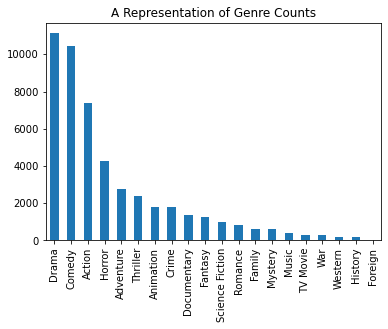

In [64]:
genre_df['genres'].value_counts().plot(kind='bar', title= 'A Representation of Genre Counts');

Drama genre is the most common of all movie genres.  

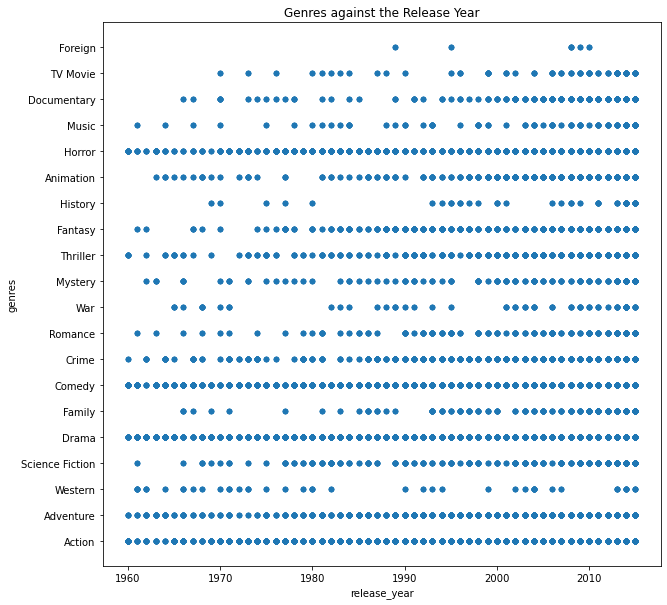

In [65]:
genre_df.plot(x='release_year', y='genres', kind='scatter', figsize=(10,10),title='Genres against the Release Year');

From the scatter graph above, the genres that have been popular since the 1960s are the Horror, Comedy, Drama, Adventure and Action genres. 

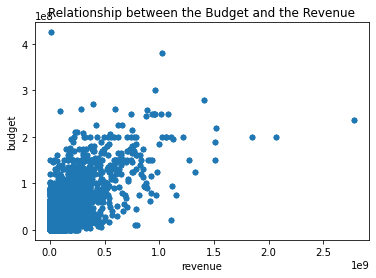

In [66]:
genre_df.plot(x='revenue', y='budget', kind='scatter', title='Relationship between the Budget and the Revenue');

The scatter plot here indicates a positive correlation between budget and revenue. This implies that high budget movie genres are also associated with high revenues.  

In [41]:
#Descriptive statistics
genre_df.describe()

id    popularity        budget       revenue       runtime  \
count   49020.000000  49020.000000  4.902000e+04  4.902000e+04  49020.000000   
mean    63288.613729      0.693197  1.612854e+07  4.408684e+07    102.757242   
std     90811.897210      1.035579  3.216933e+07  1.224097e+08     28.121767   
min         5.000000      0.000188  0.000000e+00  0.000000e+00      0.000000   
25%     10246.750000      0.231576  0.000000e+00  0.000000e+00     90.000000   
50%     18725.500000      0.418756  1.478930e+05  0.000000e+00    100.000000   
75%     70586.250000      0.774322  1.900000e+07  3.067695e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    877.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  49020.000000  49020.000000  49020.000000  4.902000e+04  4.902000e+04  
mean     238.663505      5.966320   2000.888617  1.935464e+07  5.686688e+07  
std      602.111499      0.914288     13.032655  3.562290e+07  1.512314e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       18.000000      5.400000   1994.000000  0.000000e+00  0.000000e+00  
50%       46.000000      6.000000   2005.000000  2.423270e+05  0.000000e+00  
75%      172.000000      6.600000   2011.000000  2.440828e+07  4.257348e+07  
max     9767.000000      8.700000   2015.000000  4.250000e+08  2.827124e+09

### Drawing Conclusions

#### Which movie genre generates the highest revenue?

In [42]:
genre_df.groupby('genres').revenue.mean()

genres
Action             6.528229e+07
Adventure          1.325607e+08
Animation          7.963602e+07
Comedy             3.257873e+07
Crime              3.519547e+07
Documentary        2.864035e+06
Drama              2.767718e+07
Family             6.917541e+07
Fantasy            7.204353e+07
Foreign            0.000000e+00
History            5.004788e+07
Horror             1.804527e+07
Music              2.917235e+07
Mystery            2.559222e+07
Romance            4.375474e+07
Science Fiction    8.697144e+07
TV Movie           7.118644e+05
Thriller           2.743306e+07
War                4.751845e+07
Western            3.109095e+07
Name: revenue, dtype: float64

The movie genre that generated the highest revenue is Adventure. It yielded a total revenue of 1.325607e+08

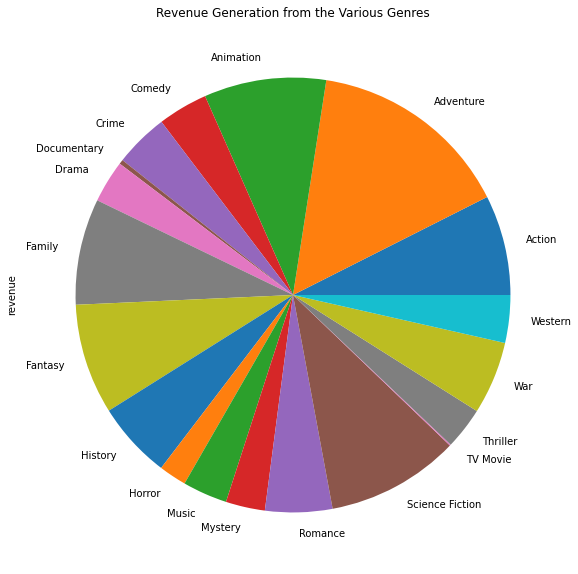

In [69]:
genre_df.groupby('genres').revenue.mean().plot(kind='pie', figsize=(10,10), title='Revenue Generation from the Various Genres');

The pie chart above shows the revenue shares from different movie genres. Adventure has the largest proportion indicating the highest revenue generation.

In [47]:
genre_df.groupby('genres').mean().popularity

genres
Action             0.876155
Adventure          1.275178
Animation          0.872010
Comedy             0.572296
Crime              0.719750
Documentary        0.209573
Drama              0.587012
Family             0.783861
Fantasy            0.907793
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.528743
Mystery            0.621116
Romance            0.786560
Science Fiction    1.156476
TV Movie           0.268062
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64

Adventure is the most popular movie genre followed by Science Fiction and then Fantasy

In [51]:
genre_df.groupby('genres').mean().budget

genres
Action             2.636964e+07
Adventure          4.273119e+07
Animation          2.388763e+07
Comedy             1.148367e+07
Crime              1.408917e+07
Documentary        6.110160e+05
Drama              1.129719e+07
Family             2.060850e+07
Fantasy            2.504036e+07
Foreign            0.000000e+00
History            1.797741e+07
Horror             5.968360e+06
Music              1.331899e+07
Mystery            1.045162e+07
Romance            1.269258e+07
Science Fiction    2.741735e+07
TV Movie           3.305085e+05
Thriller           1.261130e+07
War                2.363526e+07
Western            1.951699e+07
Name: budget, dtype: float64

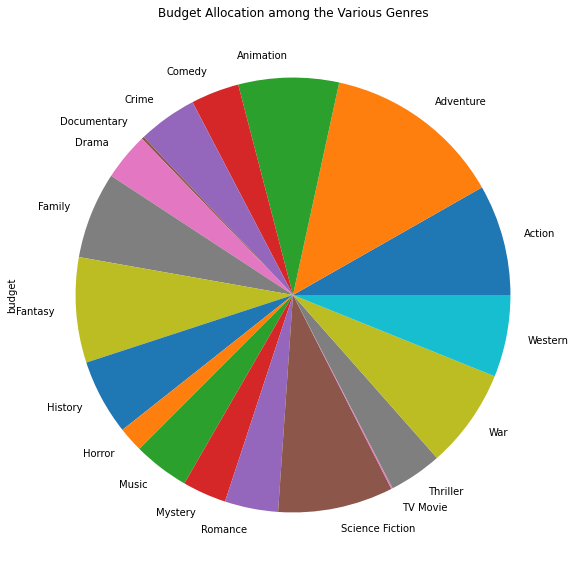

In [67]:
genre_df.groupby('genres').mean().budget.plot(kind='pie', figsize=(10,10), title='Budget Allocation among the Various Genres');

Text(0, 0.5, 'budget')

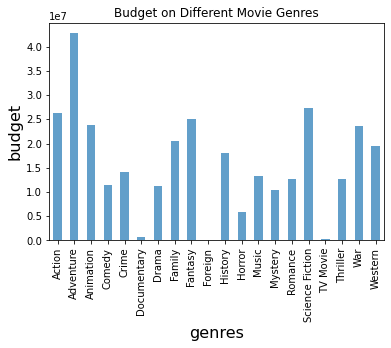

In [54]:
genre_df.groupby('genres')['budget'].mean().plot(kind='bar', title='Budget on Different Movie Genres', alpha=.7)
plt.xlabel('genres', fontsize=16)
plt.ylabel('budget', fontsize=16)

From the pie chart and bar graph, the producers spent most on production of Adventure movie genres followed by Science Fiction. 

### Conclusions


#### Findings

A data analysis was conducted for this project. The data analysis process involved identifying research questions, applying various data wrangling measures such as replacing missing values, dropping duplicates, and splitting a column to suit the analysis. The project has involved an exploratory data analysis by use of different visualizations such as scatter plots, bar graph and pie charts. 
This project focused on investigating the relationship between different movie genres and factors such as budget, revenue generation, and popularity. From this analysis we can conclude that:
1. High budget movie genres are associated with high revenues. 
2. Different movie genres generate different amounts of incomes. From this analysis, the Adventure genre was the leading in revenue generation. This implies that, more investment into the Adventure genres would be profitable for the production companies. 
3. Horror, Comedy, Drama, Adventure and Action genres are the most common movie genres over the years. Based on a plot of the different genre counts, Drama genre is the most common. However, based upon popularity means, Science Fiction is the most popular genre. 

Given more information especially about popularity, vote counts, vote average and runtime, a researcher wishing to investigate this dataset could research on the relationship between the different genres and these factors. The researcher would also identify their relationship to revenue generation. 

#### Limitations

The tmdb movie dataset has some limitations:
1. Most data is qualitative, having characteristics that cannot be extrapolated for analysis.
2. The dataset lacks explanatory information on various factors such as runtime, vote counts and vote averages, making it hard to identify their association to other factors. 